In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GENERAL PLOT OPTIONS
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['ytick.major.size'] = 6
matplotlib.rcParams['ytick.major.width'] = 1.2
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.8
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['legend.title_fontsize'] = 18
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['savefig.dpi'] = 300

from scipy.interpolate import interp1d
from scipy.integrate import quad

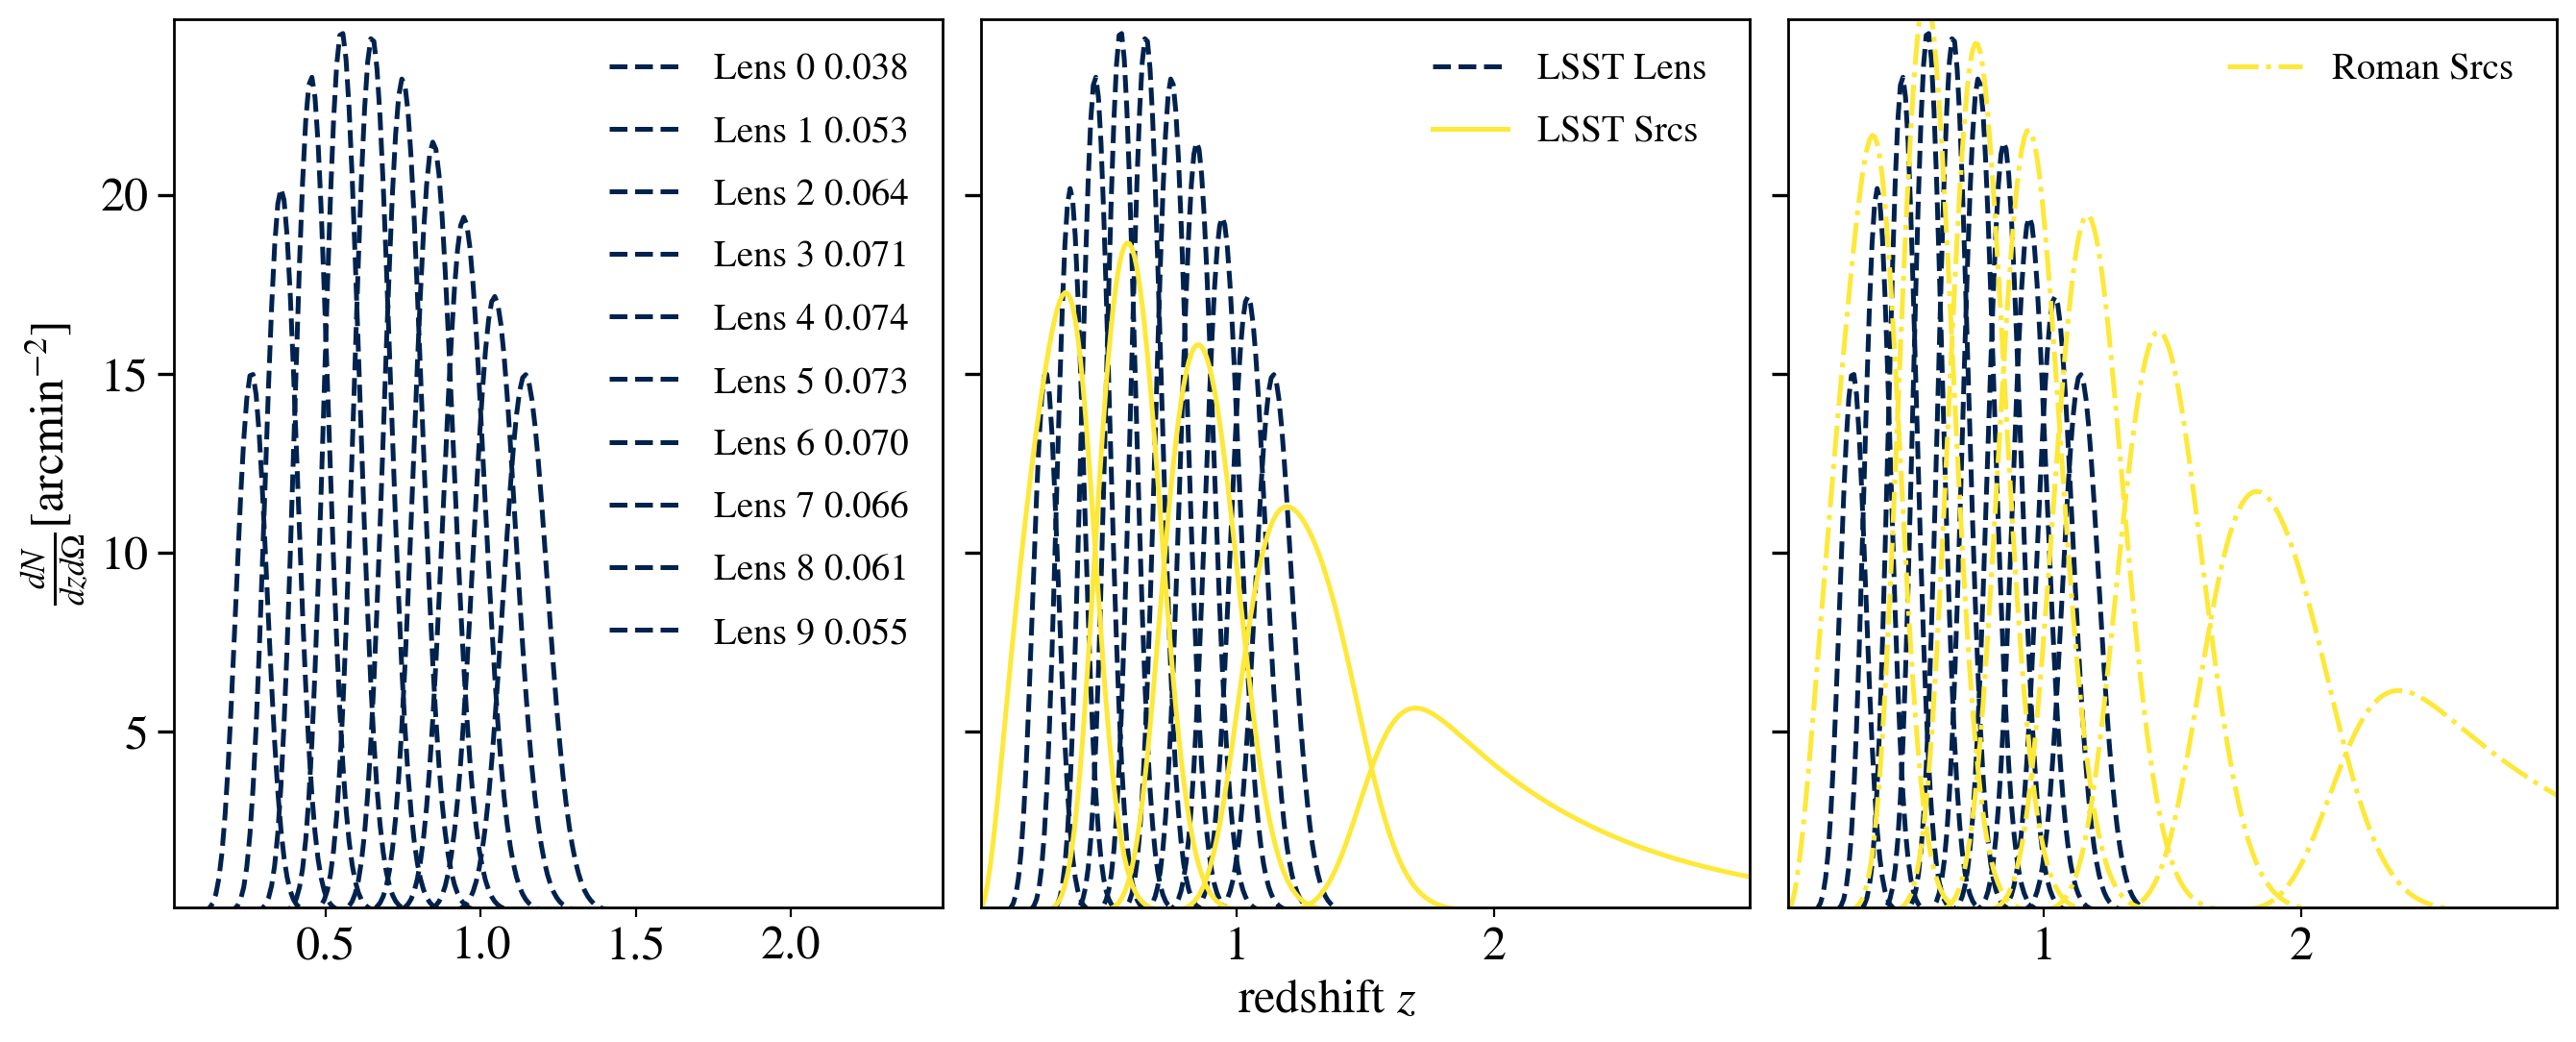

In [46]:
import itertools
def make_style_iter():
    #markers    = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']
    markers = ['o', '^', '*']
    linewidths = [1.8, 2.6]
    linestyles = ['-', '--', '-.', ':']
    return itertools.cycle(itertools.product(markers, linewidths, linestyles))

cmap = plt.get_cmap("cividis")
colors = cmap(np.arange(0, 2)/1)

lsst_lens = np.loadtxt('/project/chihway/junzhou/cocoa_approx/Cocoa/projects/lsst_real/data/lsst_lens_4firecrown.nz')
lsst_srcs =np.loadtxt('/project/chihway/junzhou/cocoa_approx/Cocoa/projects/lsst_real/data/lsst_srcs_4firecrown.nz')
roman_srcs =np.loadtxt('/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_real/data/fiducial.nz')

def plot_assemble(ax,x,y,label,c,ls,mk='none',lw=1.8):
    (ln, ) = ax.plot(x, y,markersize=6.0,color=c,label=label,linestyle=ls,linewidth=lw,marker=mk,markerfacecolor='none',markevery=10)
    return ln

fig,axs = plt.subplots(1,3,figsize=(16,6))
plt.subplots_adjust(wspace=0.05)

#plot lsst lens
lens_prob_mass = [0.037605972071246344, 0.05322110990726346, 0.06440092535187608, 
0.0710015443371609, 0.07362716482381701, 0.07312644303475142, 0.07035053881560904, 0.06604729962819815, 0.060825759540392856, 0.05515553661227458]
lines = []
for i in range(10):
    ln = plot_assemble(axs[0], lsst_lens[:,0], lsst_lens[:,i+1]*48, label=f'Lens {i} {lens_prob_mass[i]:.3f}',c=colors[0], ls=ls, mk='none', lw=lw)
    lines.append(ln)
axs[0].set_ylabel(r'$\frac{dN}{dzd\Omega}[\mathrm{arcmin}^{-2}]$')
axs[0].set_xlim(0.01,2.49)
axs[0].set_ylim(0.1,24.9)
axs[0].legend(handles=lines, frameon=False)
#axs[0].tick_params(axis='x', which='both', labelbottom=False)

lines = []
for i in range(10):
    ln = plot_assemble(axs[1], lsst_lens[:,0], lsst_lens[:,i+1]*48, label=f'LSST Lens ',c=colors[0], ls='--', mk='none')
lines.append(ln)
for i in range(5):
    ln = plot_assemble(axs[1], lsst_srcs[:,0], lsst_srcs[:,i+1]*27.1, label=f'LSST Srcs ',c=colors[1], ls='-', mk='none')
lines.append(ln)
axs[1].set_xlim(0.01,2.99)
axs[1].set_ylim(0.1,24.9)
axs[1].legend(handles=lines, frameon=False)
axs[1].tick_params(axis='y', which='both', labelleft=False)

lines = []
for i in range(10):
    ln = plot_assemble(axs[2], lsst_lens[:,0], lsst_lens[:,i+1]*48, label=f'LSST Lens ',c=colors[0], ls='--', mk='none')
for i in range(8):
    ln = plot_assemble(axs[2], roman_srcs[:,0]+0.005, roman_srcs[:,i+1]*51, label=f'Roman Srcs ',c=colors[1], ls='-.', mk='none')
lines.append(ln)
axs[2].set_xlim(0.01,2.99)
axs[2].set_ylim(0.1,24.9)
axs[2].legend(handles=lines, frameon=False)
axs[2].tick_params(axis='y', which='both', labelleft=False)

fig.supxlabel(r'redshift $z$', fontsize=18)

plt.savefig('./nofz.png', dpi=300)